## Individual Project

In [112]:
# importing required libraries
# importing libaraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier
from datetime               import datetime
from sklearn.linear_model   import LogisticRegression
from sklearn.tree           import DecisionTreeClassifier
from sklearn.ensemble       import RandomForestClassifier
from sklearn.ensemble       import GradientBoostingClassifier
from sklearn.svm            import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors      import KNeighborsClassifier
from sklearn.metrics        import accuracy_score
from sklearn.metrics        import auc
from sklearn.metrics        import roc_auc_score
from scipy.stats            import pearsonr

In [2]:
# reading in data
df=pd.read_csv(r"C:\Users\sm\Desktop\STATISTICAL AND MACHINE LEARNING\individual project\bank_mkt_train.csv")

## Data preprocessing

In [3]:
# exploring data
df.head()

,client_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,29925,42,management,married,basic.9y,no,no,no,cellular,jul,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
1,37529,35,unemployed,married,university.degree,no,yes,no,telephone,jun,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,0
2,2757,44,technician,married,basic.9y,no,yes,yes,cellular,may,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.264,5099.1,0
3,9642,45,services,married,high.school,no,yes,no,cellular,apr,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,0
4,14183,45,unknown,married,unknown,unknown,unknown,unknown,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [4]:
# no of rows and columns
df.shape

(20000, 21)

#### dataset has 20000 rows/observations and 21 columns/varibles 

In [5]:
# checking column datatypes
df.columns

Index(['client_id', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribe'],
      dtype='object')

## Data Preproceesing

In [6]:
df.dtypes

client_id           int64
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
subscribe           int64
dtype: object

###### all columns are in correct data type format

In [7]:
# checking for missing values

In [7]:
#checking for missing values
df.isna().sum()

client_id         0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribe         0
dtype: int64

#### No missing values

In [9]:
df.isna().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
19995    0
19996    0
19997    0
19998    0
19999    0
Length: 20000, dtype: int64

In [10]:
#checking for duplicated values 
print(df.duplicated().sum())


0


#### no duplicates found in dataset

#### Renaming varibles column

In [15]:
## renaming housing and loan columns
df = df.rename(columns={'housing':'house_loan', 'loan':'personal_loan' })
#df.head()

In [16]:
# repalcing unknown values to others in marital columns
df['marital'] = df['marital'].replace('unknown','others')
df["marital"].value_counts()

married     12047
single       5626
divorced     2287
others         40
Name: marital, dtype: int64

In [17]:
# repalcing unknown values to others in marital columns
df['education'] = df['education'].replace('unknown','others')
df["education"].value_counts()

university.degree      5965
high.school            4568
basic.9y               2967
professional.course    2536
basic.4y               2061
basic.6y               1110
others                  784
illiterate                9
Name: education, dtype: int64

In [18]:
## repalcing unknown values to others in marital columns
df['default'] = df['default'].replace('unknown','others')
df["default"].value_counts()

no        15843
others     4155
yes           2
Name: default, dtype: int64

In [12]:
## repalcing unknown values to others in marital columns
df['house_loan'] = df['house_loan'].replace('unknown','others')
df["house_loan"].value_counts()

yes       10475
no         9072
others      453
Name: house_loan, dtype: int64

In [13]:
## repalcing unknown values to others in marital columns
df['personal_loan'] = df['personal_loan'].replace('unknown','others')
df["personal_loan"].value_counts()

no        16494
yes        3053
others      453
Name: personal_loan, dtype: int64

### Target varible distribution

In [19]:
# Target varible distribution
df["subscribe"].value_counts()

0    17729
1     2271
Name: subscribe, dtype: int64

dataset has imbalance class proportioin - class - 0, not subscribed is the dominat class having  88.6% of proportion in data, calss 1 is minority class with jsut around 12% proportion

In [19]:
df.columns

Index(['client_id', 'age', 'job', 'marital', 'education', 'default',
       'house_loan', 'personal_loan', 'contact', 'month', 'day_of_week',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'subscribe'],
      dtype='object')

In [51]:
# selecting numerical columns
num_df = df.select_dtypes(include=['float64', 'int64'])
num_df=num_df.drop("client_id",axis=1)
num_df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,42,1,999,0,1.4,93.918,-42.7,4.968,5228.1,0
1,35,4,999,0,1.4,94.465,-41.8,4.960,5228.1,0
2,44,1,999,0,-1.8,92.893,-46.2,1.264,5099.1,0
3,45,1,999,0,-1.8,93.075,-47.1,1.453,5099.1,0
4,45,1,999,0,1.1,93.994,-36.4,4.859,5191.0,0


In [52]:
# selecting catgorical columns
cat_df = df.select_dtypes(include=['object'])
cat_df.head()

,job,marital,education,default,house_loan,personal_loan,contact,month,day_of_week,poutcome
0,management,married,basic.9y,no,no,no,cellular,jul,thu,nonexistent
1,unemployed,married,university.degree,no,yes,no,telephone,jun,mon,nonexistent
2,technician,married,basic.9y,no,yes,yes,cellular,may,mon,nonexistent
3,services,married,high.school,no,yes,no,cellular,apr,tue,nonexistent
4,unknown,married,others,others,others,others,telephone,may,wed,nonexistent


#### Feature selection

### Pearson corelation

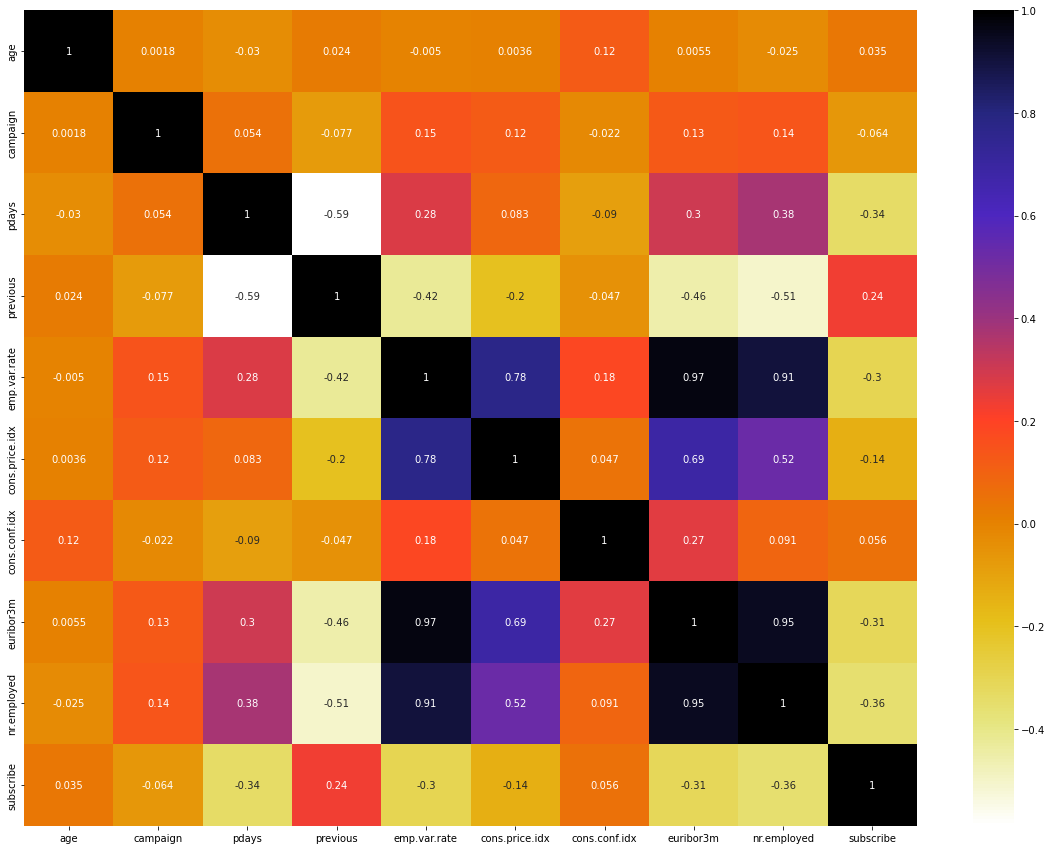

In [53]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(20,15))
cor = num_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [46]:
#reference- scikit
# with the following function we can select highly correlated features
# it will remove the first feature that is corrdfelated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [54]:
corr_features = correlation(num_df, 0.75)
len(set(corr_features))

3

In [55]:
corr_features

{'cons.price.idx', 'euribor3m', 'nr.employed'}

cons.price.idx is highly corelated with emp.varinace feature ,,, but it is week corelation with target varible , so it can be dropped

euribor3m is higly corelated with nr. employed and emp.var.rate , and having low corelaion with target varible,so it can be dropped

nr.employed' is also weekly corelated with target and have strong corelation with emp.var rate and euror 3m ,so it cna be dropped


In [56]:
num_df=num_df.drop(corr_features,axis=1)

num_df

,age,campaign,pdays,previous,emp.var.rate,cons.conf.idx,subscribe
0,42,1,999,0,1.4,-42.7,0
1,35,4,999,0,1.4,-41.8,0
2,44,1,999,0,-1.8,-46.2,0
3,45,1,999,0,-1.8,-47.1,0
4,45,1,999,0,1.1,-36.4,0
...,...,...,...,...,...,...,...
19995,45,1,999,0,1.4,-42.7,1
19996,26,2,999,1,-1.8,-46.2,0
19997,33,1,999,1,-1.8,-46.2,0
19998,43,10,999,0,1.4,-42.7,0


In [76]:
# concating the numerical and catagorical columns
data = pd.concat([num_df.reset_index(drop=True), cat_df.reset_index(drop=True)], axis=1)

In [62]:
data.head()

,age,campaign,pdays,previous,emp.var.rate,cons.conf.idx,subscribe,job_admin.,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,42,1,999,0,1.4,-42.7,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,35,4,999,0,1.4,-41.8,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,44,1,999,0,-1.8,-46.2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,45,1,999,0,-1.8,-47.1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,45,1,999,0,1.1,-36.4,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [88]:
data = pd.get_dummies(data)

In [64]:
data.head()

,age,campaign,pdays,previous,emp.var.rate,cons.conf.idx,subscribe,job_admin.,job_blue-collar,job_entrepreneur,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,42,1,999,0,1.4,-42.7,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,35,4,999,0,1.4,-41.8,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,44,1,999,0,-1.8,-46.2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,45,1,999,0,-1.8,-47.1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,45,1,999,0,1.1,-36.4,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [89]:
X=data.drop("subscribe",axis=1)

In [90]:
y=data["subscribe"]

#### Mutual infimation gain_classification

In [91]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X, y)
mutual_info

array([1.56896327e-02, 3.64079100e-03, 3.16595539e-02, 2.13270929e-02,
       5.99024205e-02, 6.67166921e-02, 1.27206944e-03, 5.95487929e-03,
       2.27637924e-04, 0.00000000e+00, 0.00000000e+00, 4.67628839e-04,
       4.80041521e-03, 0.00000000e+00, 2.71623077e-03, 4.95238184e-04,
       0.00000000e+00, 0.00000000e+00, 2.46816787e-03, 1.06337455e-03,
       0.00000000e+00, 6.18586645e-03, 0.00000000e+00, 2.62802834e-03,
       0.00000000e+00, 0.00000000e+00, 8.82018244e-04, 2.16966045e-03,
       2.44361907e-03, 3.47440880e-03, 1.03088980e-02, 6.06476794e-03,
       2.61094805e-03, 1.27328857e-03, 1.15425521e-04, 1.32734065e-03,
       2.22975373e-03, 0.00000000e+00, 0.00000000e+00, 1.04120427e-02,
       1.77439134e-02, 5.76385858e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.24952230e-03, 8.49303801e-03,
       5.46868790e-05, 6.18576210e-03, 7.14631279e-03, 0.00000000e+00,
       8.19670255e-05, 4.48525391e-03, 6.70899784e-04, 1.94649960e-04,
      

In [92]:
#let's plot the ordered mutual_info values per feature
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

cons.conf.idx                    0.066717
emp.var.rate                     0.059902
pdays                            0.031660
poutcome_success                 0.030082
previous                         0.021327
poutcome_nonexistent             0.021237
contact_telephone                0.017744
age                              0.015690
contact_cellular                 0.010412
default_no                       0.010309
month_mar                        0.009250
month_may                        0.008493
month_sep                        0.007146
marital_single                   0.006186
month_oct                        0.006186
default_others                   0.006065
job_blue-collar                  0.005955
month_apr                        0.005764
job_self-employed                0.004800
day_of_week_thu                  0.004485
campaign                         0.003641
education_university.degree      0.003474
job_student                      0.002716
education_basic.6y               0

<AxesSubplot:>

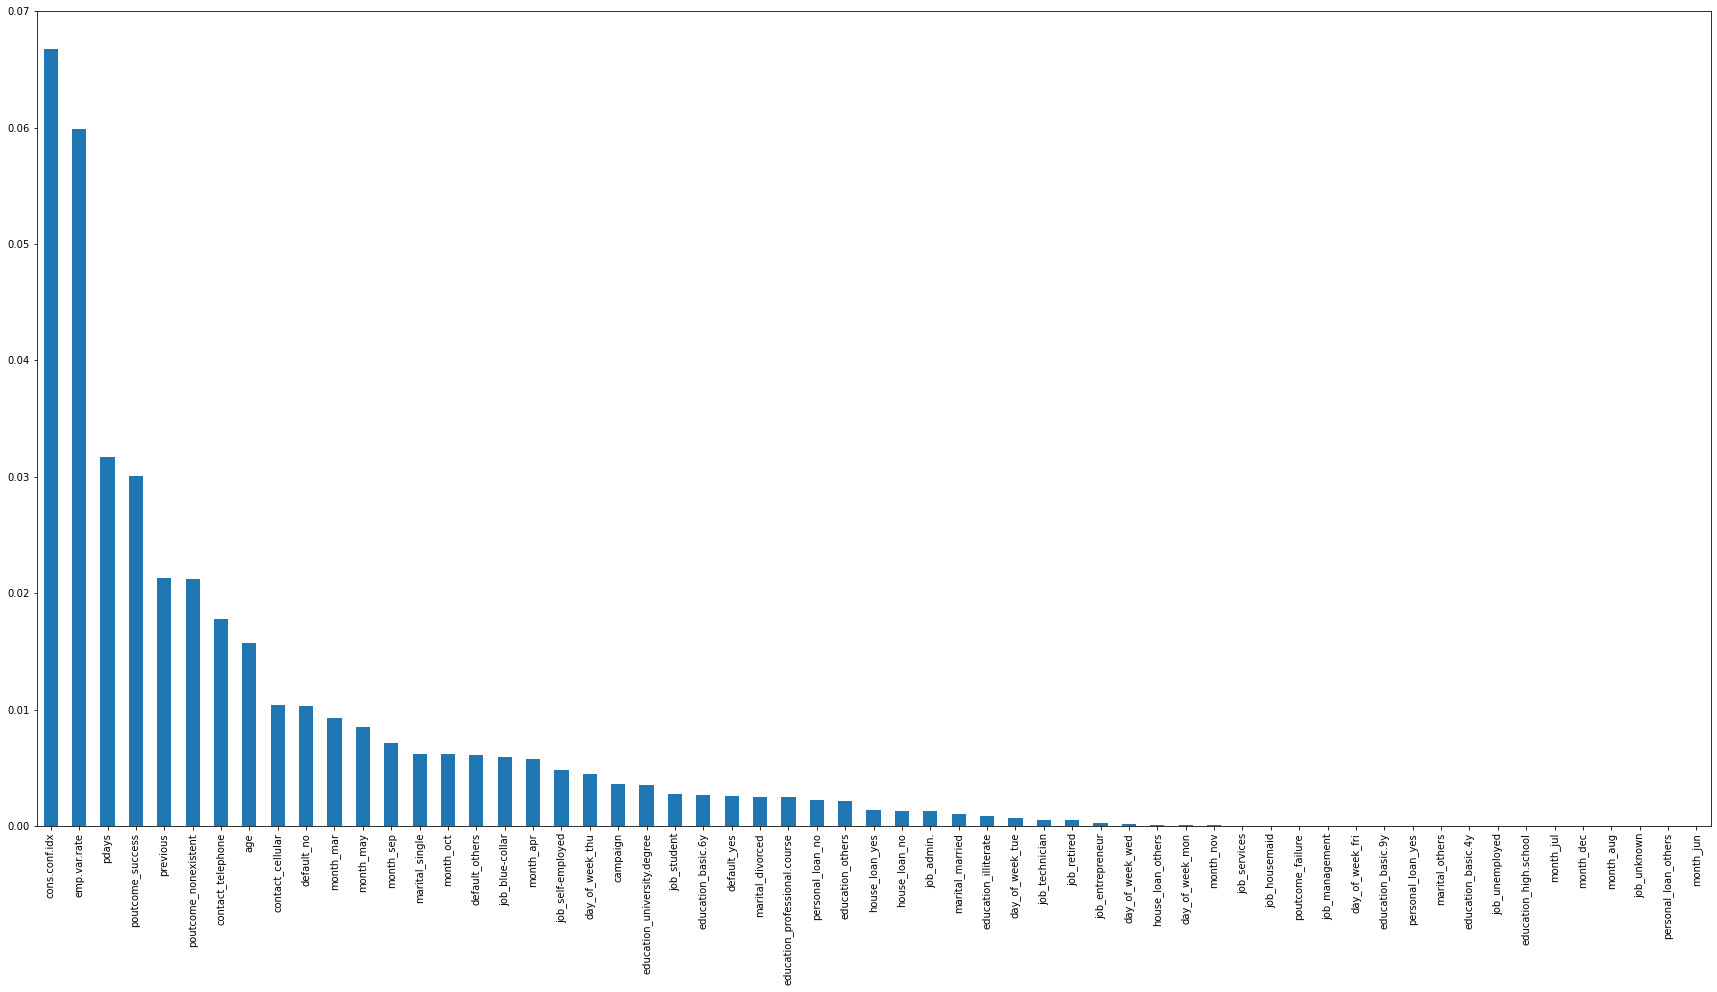

In [93]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(30, 15))

In [72]:
cat_df.head()

,job,marital,education,default,house_loan,personal_loan,contact,month,day_of_week,poutcome
0,management,married,basic.9y,no,no,no,cellular,jul,thu,nonexistent
1,unemployed,married,university.degree,no,yes,no,telephone,jun,mon,nonexistent
2,technician,married,basic.9y,no,yes,yes,cellular,may,mon,nonexistent
3,services,married,high.school,no,yes,no,cellular,apr,tue,nonexistent
4,unknown,married,others,others,others,others,telephone,may,wed,nonexistent


we could drop all these varibles , as information gain  form these varibles are zero, which doesnt contribute any information to predict target varible
these are mostly reduant varibles coming from one -hot -encoding

day_of_week_tue                  0.000000

day_of_week_wed                  0.000000

day_of_week_mon                  0.000000

job_management                   0.000000

poutcome_failure                 0.000000

job_services                     0.000000

education_professional.course    0.000000

marital_divorced                 0.000000

month_jun                        0.000000

month_aug                        0.000000

marital_others                   0.000000

education_basic.4y               0.000000

personal_loan_others             0.000000

job_entrepreneur                 0.000000

default_yes                      0.000000

education_illiterate             0.000000

month_jul                        0.000000

we have total 59 features , but 20 features are reduant , few other varibles are having very low info gain value ,
so am considering only top 30 varibles for the model building

In [96]:
top_30_features = mutual_info.sort_values(ascending=False).head(30)


In [97]:
#X = X.drop(top_25_features.index, axis=1)
X = X.loc[:, top_30_features.index]

In [98]:
X.head()

,cons.conf.idx,emp.var.rate,pdays,poutcome_success,previous,poutcome_nonexistent,contact_telephone,age,contact_cellular,default_no,...,campaign,education_university.degree,job_student,education_basic.6y,default_yes,marital_divorced,education_professional.course,personal_loan_no,education_others,house_loan_yes
0,-42.7,1.4,999,0,0,1,0,42,1,1,...,1,0,0,0,0,0,0,1,0,0
1,-41.8,1.4,999,0,0,1,1,35,0,1,...,4,1,0,0,0,0,0,1,0,1
2,-46.2,-1.8,999,0,0,1,0,44,1,1,...,1,0,0,0,0,0,0,0,0,1
3,-47.1,-1.8,999,0,0,1,0,45,1,1,...,1,0,0,0,0,0,0,1,0,1
4,-36.4,1.1,999,0,0,1,1,45,0,0,...,1,0,0,0,0,0,0,0,1,0


In [238]:
X.shape

(20000, 30)

### Train -test split

In [108]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model building

In [113]:
# Define models
tree         = DecisionTreeClassifier()
logistic     = LogisticRegression()
randomForest = RandomForestClassifier()
boostedTree  = GradientBoostingClassifier()
neighbors    = KNeighborsClassifier()

models = {"tree"         :tree,
          "logistic"     :logistic,
          "randomForest" :randomForest,
          "boostedTree"  :boostedTree,
          "neighbors"    :neighbors
         }

In [115]:
# Train the models
for model in models:
    models[model].fit(X_train,y_train)
    print(f"{model} has been trained successfully")

tree has been trained successfully


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logistic has been trained successfully
randomForest has been trained successfully
boostedTree has been trained successfully
neighbors has been trained successfully


In [117]:
# test models 
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

performances = {}

for model in models:
    train_preds   = models[model].predict(X_train)
    test_preds    = models[model].predict(X_test)
    train_probs   = pd.DataFrame(models[model].predict_proba(X_train))[1]
    test_probs    = pd.DataFrame(models[model].predict_proba(X_test))[1]
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy  = accuracy_score(y_test, test_preds)
    train_auc      = roc_auc_score(y_train, train_probs)
    test_auc       = roc_auc_score(y_test, test_probs)
    train_precision = precision_score(y_train, train_preds)
    test_precision  = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall  = recall_score(y_test, test_preds)
    train_f1_score = f1_score(y_train, train_preds)
    test_f1_score  = f1_score(y_test, test_preds)
    
    performances[model] = {'Train Accuracy': train_accuracy,
                            'Test Accuracy': test_accuracy,
                            'Train AUC': train_auc,
                            'Test AUC': test_auc,
                            'Train Precision': train_precision,
                            'Test Precision': test_precision,
                            'Train Recall': train_recall,
                            'Test Recall': test_recall,
                            'Train F1 Score': train_f1_score,
                            'Test F1 Score': test_f1_score}



In [118]:
pd.DataFrame(performances)

,tree,logistic,randomForest,boostedTree,neighbors
Train Accuracy,0.988875,0.901250,0.988875,0.907375,0.914813
Test Accuracy,0.827500,0.889750,0.875000,0.892500,0.874750
Train AUC,0.999328,0.787908,0.999063,0.809612,0.926596
Test AUC,0.604845,0.758794,0.725785,0.767550,0.708385
Train Precision,0.999379,0.685817,0.983183,0.753744,0.715886
Test Precision,0.295635,0.638710,0.471831,0.653409,0.469534
Train Recall,0.900951,0.213766,0.916060,0.253497,0.393397
Test Recall,0.307851,0.204545,0.276860,0.237603,0.270661
Train F1 Score,0.947616,0.325939,0.948436,0.379397,0.507765
Test F1 Score,0.301619,0.309859,0.348958,0.348485,0.343381


#### Results:

tree model is overfitting badly perfotming on test data

logistic regresiion performs better but recall is very less

random forest over fitting

boosted is performing well both on trian adn test data  also it has better preciiosn and recall compared to LR model

Knn is overfitting 

Since , majority of models are overfitting , and also we see that train and test recall is on lower side around  20-25 % , 

feature selection and cross validation is necessary to validate the models again


#### Forward step feature selction

In [207]:

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.ensemble import GradientBoostingClassifier as gbt

 trying with gradient boositng, LR and RF as these models are perfoming well with all features,
  
  idea is to selct the optimal number of features needed comapring all 3 models and try to find out common varibles

In [210]:
# gradient boosting with accuracy as metrics
SFS1= SFS(GradientBoostingClassifier(),
          k_features=(1,30),
          forward=True,
          floating=False,
          verbose=2,
          scoring="roc_auc",
          cv=2)

SFS2=SFS1.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   14.4s finished

[2023-04-29 04:25:07] Features: 1/30 -- score: 0.7843735183603254[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   25.2s finished

[2023-04-29 04:25:32] Features: 2/30 -- score: 0.7893608322722837[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   27.9s finished

[2023-04-29 04:26:00] Features: 3/30 -- score: 0.7929807574726934[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.7s finished

[2023-04-29 04:35:48] Features: 28/30 -- score: 0.7947776956010372[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.9s finished

[2023-04-29 04:35:55] Features: 29/30 -- score: 0.7943196946475861[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s finished

[2023-04-29 04:35:58] Features: 30/30 -- score: 0.7936535450063787

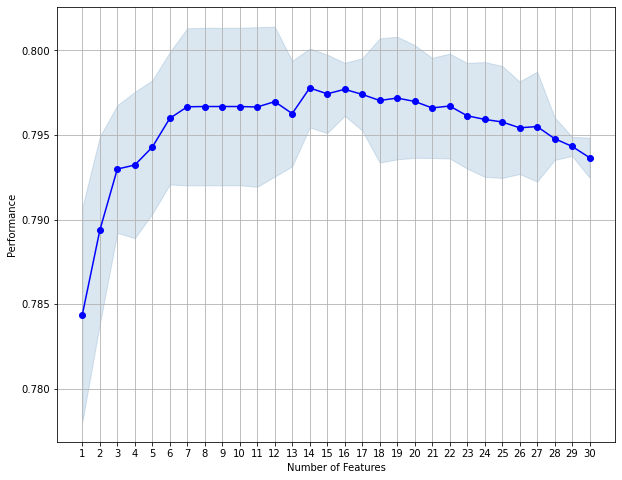

In [211]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1=plot_sfs(SFS2.get_metric_dict(confidence_interval=0.95), kind ='std_err',figsize=(10, 8))
plt.grid()
plt.show()

graph shows that, highes accuracy can be obtained with 7 features , after that it's kind of  stagant till 11  features , and we see sudden increase for 12 feautres  in auc,,  after that it starts declining  this can be analysed further  with manual inspection

In [213]:
results_df = pd.DataFrame.from_dict(SFS2.get_metric_dict()).T
results_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[0.7907130187719282, 0.7780340179487226]",0.784374,"(cons.conf.idx,)",0.027277,0.00634,0.00634
2,"(0, 3)","[0.7948907997430417, 0.7838308648015258]",0.789361,"(cons.conf.idx, poutcome_success)",0.023794,0.00553,0.00553
3,"(0, 3, 15)","[0.7967515742014837, 0.789209940743903]",0.792981,"(cons.conf.idx, poutcome_success, default_others)",0.016225,0.003771,0.003771
4,"(0, 3, 15, 29)","[0.797538064375438, 0.7888977144436657]",0.793218,"(cons.conf.idx, poutcome_success, default_others, house_loan_yes)",0.018588,0.00432,0.00432
5,"(0, 3, 5, 15, 29)","[0.7982221367164622, 0.7903300043886409]",0.794276,"(cons.conf.idx, poutcome_success, poutcome_nonexistent, default_others, house_loan_yes)",0.016979,0.003946,0.003946
6,"(0, 3, 5, 6, 15, 29)","[0.7998857962379882, 0.7920683815737528]",0.795977,"(cons.conf.idx, poutcome_success, poutcome_nonexistent, contact_telephone, default_others, house_loan_yes)",0.016818,0.003909,0.003909
7,"(0, 3, 5, 6, 15, 17, 29)","[0.8013009743402363, 0.7920191903870504]",0.79666,"(cons.conf.idx, poutcome_success, poutcome_nonexistent, contact_telephone, default_others, month_apr, house_loan_yes)",0.019968,0.004641,0.004641
8,"(0, 3, 5, 6, 8, 15, 17, 29)","[0.8013272878450045, 0.7920240701527712]",0.796676,"(cons.conf.idx, poutcome_success, poutcome_nonexistent, contact_telephone, contact_cellular, default_others, month_apr, house_loan_yes)",0.020014,0.004652,0.004652
9,"(0, 3, 5, 6, 8, 11, 15, 17, 29)","[0.8013272878450045, 0.7920240701527712]",0.796676,"(cons.conf.idx, poutcome_success, poutcome_nonexistent, contact_telephone, contact_cellular, month_may, default_others, month_apr, house_loan_yes)",0.020014,0.004652,0.004652
10,"(0, 3, 5, 6, 8, 11, 15, 17, 24, 29)","[0.8013272878450045, 0.7920240701527712]",0.796676,"(cons.conf.idx, poutcome_success, poutcome_nonexistent, contact_telephone, contact_cellular, month_may, default_others, month_apr, default_yes, house_loan_yes)",0.020014,0.004652,0.004652


In [221]:
gbt_feautres=["cons.conf.idx", "poutcome_success", "poutcome_nonexistent", "contact_telephone", "contact_cellular", "default_no", "month_mar", "month_may",  "default_others", "month_apr", "default_yes", "house_loan_yes"]
gbt_feautres

['cons.conf.idx',
 'poutcome_success',
 'poutcome_nonexistent',
 'contact_telephone',
 'contact_cellular',
 'default_no',
 'month_mar',
 'month_may',
 'default_others',
 'month_apr',
 'default_yes',
 'house_loan_yes']

In [120]:
# roc_auc score as metric with random forest
SFS_train= SFS(rfc(n_jobs=-1),
          k_features=(1,30),
          forward=True,
          floating=False,
          verbose=2,
          scoring="roc_auc",
          cv=5)

SFS_train=SFS_train.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   48.5s finished

[2023-04-28 15:46:19] Features: 1/30 -- score: 0.7865713209076148[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   40.4s finished

[2023-04-28 15:47:00] Features: 2/30 -- score: 0.7909114108181827[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   40.0s finished

[2023-04-28 15:47:40] Features: 3/30 -- score: 0.7924597160333493[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.1s finished

[2023-04-28 15:59:17] Features: 28/30 -- score: 0.7472156370348817[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.4s finished

[2023-04-28 15:59:24] Features: 29/30 -- score: 0.7542940426217767[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s finished

[2023-04-28 15:59:27] Features: 30/30 -- score: 0.7543285779327992

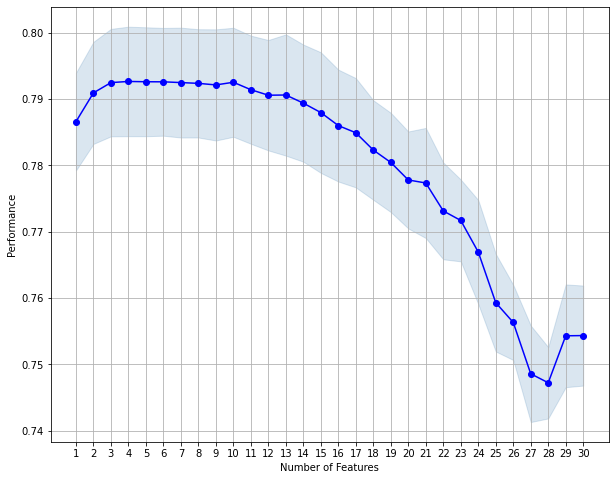

In [124]:
fig1=plot_sfs(SFS_train.get_metric_dict(confidence_interval=0.95), kind ='std_err',figsize=(10, 8))
plt.grid()
plt.show()

roc_acus score follows same curve as auuracy, best roc_acu score can be obtaines with 11 features , after increasing features casues decline of auc score

In [ ]:
pd.set_option('display.max_colwidth', 300)
results_df = pd.DataFrame.from_dict(SFS_lgr.get_metric_dict()).T
results_df

In [212]:
## logistic regression with F1 score as metric
SFS_lgr= SFS(LGR(max_iter=1000),
          k_features=(1,30),
          forward=True,
          floating=False,
          verbose=2,
          scoring="roc_auc",
          cv=2)


SFS_lgr=SFS_lgr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.4s finished

[2023-04-29 04:44:11] Features: 1/30 -- score: 0.7183458270113069[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    1.6s finished

[2023-04-29 04:44:12] Features: 2/30 -- score: 0.7607850181669289[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    1.8s finished

[2023-04-29 04:44:14] Features: 3/30 -- score: 0.7770049649057573[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.2s finished

[2023-04-29 04:47:20] Features: 28/30 -- score: 0.7864891585108859[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s finished

[2023-04-29 04:47:23] Features: 29/30 -- score: 0.7861321452234665[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished

[2023-04-29 04:47:25] Features: 30/30 -- score: 0.7855589164270113

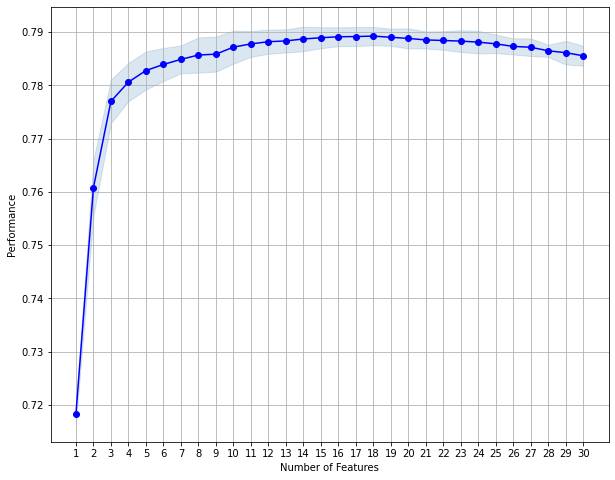

In [215]:
fig1=plot_sfs(SFS_lgr.get_metric_dict(confidence_interval=0.95), kind ='std_err',figsize=(10, 8))
plt.grid()
plt.show()

In [216]:
pd.set_option('display.max_colwidth', 300)
results_df = pd.DataFrame.from_dict(SFS_lgr.get_metric_dict()).T
results_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.7168064985217956, 0.7198851555008182]",0.718346,"(emp.var.rate,)",0.006623,0.001539,0.001539
2,"(1, 11)","[0.766030951299375, 0.7555390850344827]",0.760785,"(emp.var.rate, month_may)",0.022571,0.005246,0.005246
3,"(1, 2, 11)","[0.7810780217475601, 0.7729319080639545]",0.777005,"(emp.var.rate, pdays, month_may)",0.017525,0.004073,0.004073
4,"(1, 2, 9, 11)","[0.7842069653265215, 0.7770301242105011]",0.780619,"(emp.var.rate, pdays, default_no, month_may)",0.01544,0.003588,0.003588
5,"(1, 2, 9, 11, 17)","[0.7863573459033103, 0.7792032727801631]",0.78278,"(emp.var.rate, pdays, default_no, month_may, month_apr)",0.015391,0.003577,0.003577
6,"(1, 2, 4, 9, 11, 17)","[0.787022195204923, 0.7808223318228098]",0.783922,"(emp.var.rate, pdays, previous, default_no, month_may, month_apr)",0.013338,0.0031,0.0031
7,"(1, 2, 4, 8, 9, 11, 17)","[0.7874924506239688, 0.782267372123378]",0.78488,"(emp.var.rate, pdays, previous, contact_cellular, default_no, month_may, month_apr)",0.011241,0.002613,0.002613
8,"(1, 2, 4, 8, 9, 11, 17, 22)","[0.7889947626671557, 0.7823965285031838]",0.785696,"(emp.var.rate, pdays, previous, contact_cellular, default_no, month_may, month_apr, job_student)",0.014195,0.003299,0.003299
9,"(1, 2, 4, 8, 9, 10, 11, 17, 22)","[0.78913704467198, 0.7825762927758687]",0.785857,"(emp.var.rate, pdays, previous, contact_cellular, default_no, month_mar, month_may, month_apr, job_student)",0.014114,0.00328,0.00328
10,"(1, 2, 4, 8, 9, 10, 11, 13, 17, 22)","[0.7902705737336704, 0.7840720196752154]",0.787171,"(emp.var.rate, pdays, previous, contact_cellular, default_no, month_mar, month_may, marital_single, month_apr, job_student)",0.013335,0.003099,0.003099


In [218]:
lgr_features =["emp.var.rate", "pdays, previous", "poutcome_nonexistent", "contact_telephone", "contact_cellular", "default_no", "month_mar", "month_may", "marital_single", "month_oct", "default_others", "month_apr", "campaign", "job_student", "default_yes", "house_loan_yes"]
lgr_features

['emp.var.rate',
 'pdays, previous',
 'poutcome_nonexistent',
 'contact_telephone',
 'contact_cellular',
 'default_no',
 'month_mar',
 'month_may',
 'marital_single',
 'month_oct',
 'default_others',
 'month_apr',
 'campaign',
 'job_student',
 'default_yes',
 'house_loan_yes']

auc score is increasing till 11th features, then we minot increase in auc  till 17th features,   after that it stars declinig

 i have selected top 11 features from gradient boosting and top 17 features from logistic refression
 
its well evident that , all 11 features of boosting model is picked up by LR model also , any varibles addition after 11, LR is 
giving very slight increase in accuracy , to conclude, we can selct 11 to 15 varibles for optimal results .

here am selecting 16 varibles, by carefully assesing 2 models and maully insoecting varibles

#### Selcting features

In [229]:
selected_features =["cons.conf.idx","job_student","previous","emp.var.rate", "poutcome_success", "poutcome_nonexistent", "contact_telephone", "contact_cellular", "default_no", "month_mar", "month_may", "marital_single", "default_others", "month_apr", "default_yes", "house_loan_yes"]

In [230]:
selected_features

['cons.conf.idx',
 'job_student',
 'previous',
 'emp.var.rate',
 'poutcome_success',
 'poutcome_nonexistent',
 'contact_telephone',
 'contact_cellular',
 'default_no',
 'month_mar',
 'month_may',
 'marital_single',
 'default_others',
 'month_apr',
 'default_yes',
 'house_loan_yes']

In [233]:
# filter selected features for train data

X_train_new = X_train.loc[:, selected_features]

# filter selected features for test data
X_test_new = X_test.loc[:, selected_features]

#### Retraining  models

In [234]:
# Define the models dictionary
tree         = DecisionTreeClassifier()
logistic     = LogisticRegression()
randomForest = RandomForestClassifier()
boostedTree  = GradientBoostingClassifier()
neighbors    = KNeighborsClassifier()

models = {"tree"         :tree,
          "logistic"     :logistic,
          "randomForest" :randomForest,
          "boostedTree"  :boostedTree,
          "neighbors"    :neighbors
         }

#### Training and cross validating with 5 K-FOLD 

In [235]:

# Create a dictionary to store the cross-validated accuracy scores
cv_scores = {}

# Perform cross-validation on all models and store the results in the dictionary
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_new, y_train, cv=5, scoring='accuracy')
    mean_score = np.mean(scores)
    cv_scores[model_name] = mean_score

# Convert the dictionary to a dataframe
cv_df = pd.DataFrame.from_dict(cv_scores, orient='index', columns=['Cross-validated mean Accuracy Score'])

# Print the dataframe
cv_df


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

,Cross-validated mean Accuracy Score
tree,0.895750
logistic,0.900750
randomForest,0.897437
boostedTree,0.901250
neighbors,0.893125


Gradint boositn as higest  cv mean score with 90.1% and follwed by logisitc with 90% accuracy

in this step we can select the gradint boosting , to predic the result on our final test data.

However, to comapre  results of all models, am selcting the best performing models for each algorithm and predicting the results

In [236]:


# Get the best 5 models
sorted_models = sorted([(model_name, np.mean(cross_val_score(model, X_train_new, y_train, cv=5, scoring='accuracy'))) for model_name, model in models.items()], key=lambda x: x[1], reverse=True)
best_models = [models[model_name] for model_name, _ in sorted_models[:5]]





C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [237]:
import pandas as pd
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

# Initialize empty lists to store the metrics for each model
model_names = []
train_accuracy = []
test_accuracy = []
train_auc = []
test_auc = []
train_f1 = []
test_f1 = []
train_precision = []
test_precision = []
train_recall = []
test_recall = []

# Fit each of the best models and compute the metrics
for model in best_models:
    model.fit(X_train_new, y_train)
    y_train_pred = model.predict(X_train_new)
    y_test_pred = model.predict(X_test_new)
    
    # Compute the metrics for the train data
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    train_auc.append(roc_auc_score(y_train, y_train_pred))
    train_f1.append(f1_score(y_train, y_train_pred))
    train_precision.append(precision_score(y_train, y_train_pred))
    train_recall.append(recall_score(y_train, y_train_pred))
    
    # Compute the metrics for the test data
    test_accuracy.append(accuracy_score(y_test, y_test_pred))
    test_auc.append(roc_auc_score(y_test, y_test_pred))
    test_f1.append(f1_score(y_test, y_test_pred))
    test_precision.append(precision_score(y_test, y_test_pred))
    test_recall.append(recall_score(y_test, y_test_pred))
    
    # Record the model's name
    model_names.append(type(model).__name__)

# Create a DataFrame with the metrics for each model
metrics_df = pd.DataFrame({
    "Model": model_names,
    "Train Accuracy": train_accuracy,
    "Test Accuracy": test_accuracy,
    "Train AUC": train_auc,
    "Test AUC": test_auc,
    "Train F1": train_f1,
    "Test F1": test_f1,
    "Train Precision": train_precision,
    "Test Precision": test_precision,
    "Train Recall": train_recall,
    "Test Recall": test_recall
})

# Display the DataFrame
metrics_df


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Train Accuracy,Test Accuracy,Train AUC,Test AUC,Train F1,Test F1,Train Precision,Test Precision,Train Recall,Test Recall
0,GradientBoostingClassifier,0.905250,0.89150,0.610806,0.595305,0.353242,0.313291,0.743268,0.668919,0.231673,0.204545
1,LogisticRegression,0.900250,0.89025,0.587933,0.584794,0.293805,0.286179,0.701903,0.671756,0.185786,0.181818
2,RandomForestClassifier,0.915687,0.88600,0.661446,0.609102,0.469524,0.341040,0.789683,0.567308,0.334079,0.243802
3,DecisionTreeClassifier,0.915687,0.88700,0.649460,0.599872,0.448262,0.321321,0.832827,0.587912,0.306659,0.221074
4,KNeighborsClassifier,0.903813,0.87875,0.656719,0.605869,0.440160,0.329184,0.628898,0.497908,0.338556,0.245868


### Final results

after feature selction, overfitting problem is reduced, auc and accuracfy for both traina dn test scores are very close in all models, However from the above table we can observe that   Gradient bossting is perfoeming well over other models, with promising results in all metrics 

  train auc 0.61 and test auc is 0.595 of boosting model indicating that model is able to classify well on test data,  witht the test precision of 66.8% , which is the highest over other models .
  
 so Gradient boosting can be selected as best performing model for the given dataset.
  
  



## Data visualization /Exploration

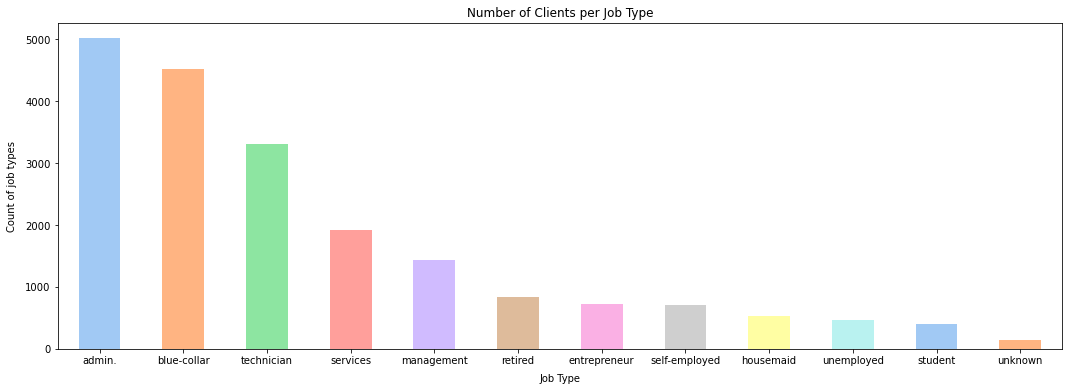

In [20]:
# visualizing job types
import seaborn as sns
sns.set_palette("pastel")
df["job"].value_counts().plot(kind='bar', figsize=(18, 6), rot=0, color=sns.color_palette())
plt.xlabel("Job Type", labelpad=8)
plt.ylabel("Count of job types", labelpad=8)
plt.title("Number of Clients per Job Type");

<AxesSubplot:>

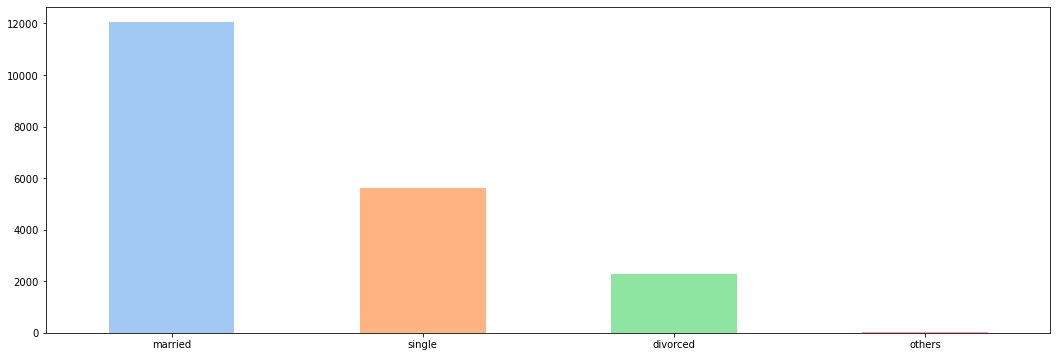

In [65]:
df["marital"].value_counts().plot(kind='bar', figsize=(18, 6), rot=0, color=sns.color_palette())

<AxesSubplot:>

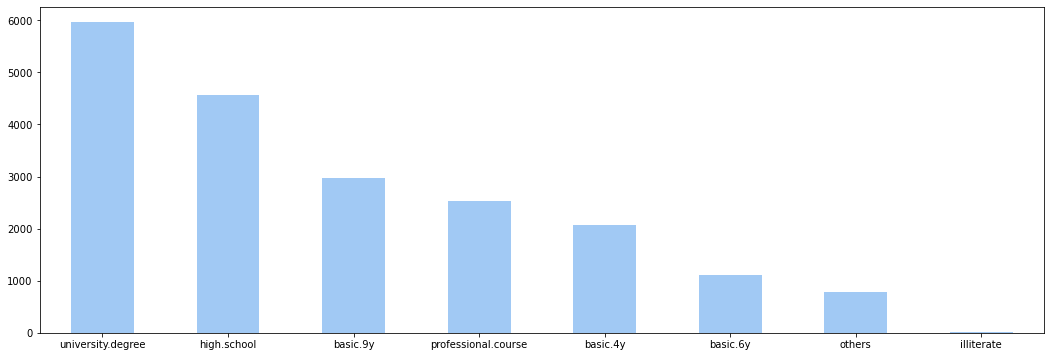

In [21]:
df["education"].value_counts().plot(kind='bar', figsize=(18, 6), rot=0)


<AxesSubplot:>

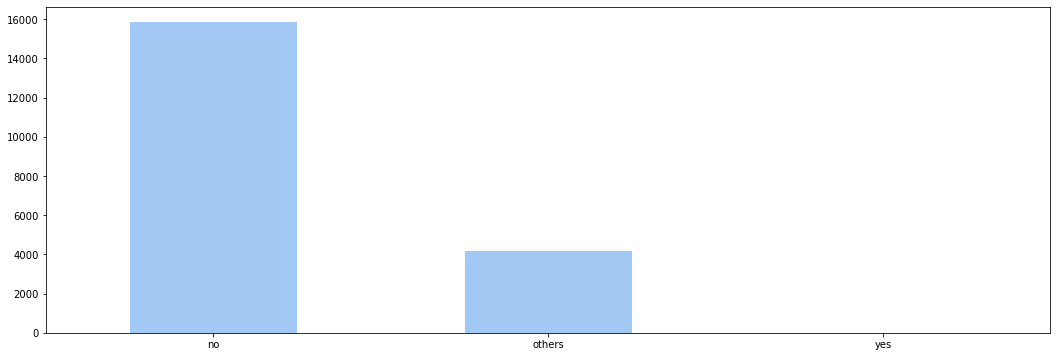

In [22]:
df["default"].value_counts().plot(kind='bar', figsize=(18, 6), rot=0)

In [23]:
df.columns

Index(['client_id', 'age', 'job', 'marital', 'education', 'default',
       'house_loan', 'personal_loan', 'contact', 'month', 'day_of_week',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'subscribe'],
      dtype='object')

#### Data pre-processing